<h1 style="text-align:center">   
      <font color = purple >🎮👾 Google Play Store 👾🎮  </font>    
</h1>
<hr style="width:100%;height:5px;border-width:0;color:gray;background-color:gray">
<center><img src="https://media.giphy.com/media/MRDICUC5enJy8/giphy.gif"></center>

Gerekli kütüphaneleri yükleyelim.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


Veri çerçevemizi bulunduğumuz dizinden yükleyelim ve bir veri çerçevesi haline getirerek df değişkenine atayalım. (pd.read_csv(...csv))

In [2]:
googleplaystore = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')
df = googleplaystore.copy()

Veri çerçevesinin ilk 5 gözlemini görüntüleyelim.

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Veri çerçevesinin son 5 gözlemini görüntüleyelim.

In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


Veri çerçevesinin kaç öznitelik ve kaç gözlemden oluştuğunu görüntüleyelim.

In [5]:
df.shape
print('gozlem degeri :',df.shape[0],' degisken : ',df.shape[1])

gozlem degeri : 10841  degisken :  13


Veri çerçevesindeki değişkenlerin hangi tipte olduğunu ve bellek kullanımını görüntüleyelim.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* İnfo () 'yu kullandıktan sonra, sayısal veri türüne sahip yalnızca bir değişken olduğunu gördük. Sayısal olması gereken bazı değişkenleri dönüştürmemiz gerekiyor.  Size, Installs, Price gibi bunların sayısal olmamalarının nedeni içinde '+', '$' olmasıdır. 



Veri çerçevesindeki sayısal değişken için temel istatistik değerlerini görüntüleyelim.

Standart sapma ve ortalama değerden çıkarımda bulunarak değişkenin ne kadar varyansa sahip olduğu hakkında fikir yürütelim.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


Veri çerçevesinde hangi öznitelikte kaç adet eksik değer olduğunu gözlemleyelim.

In [8]:
df.isna().sum()
#eksik deger olan 5 adet ozniteligimiz var.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

* Gördüğümüz gibi Rating  sütununda 1474 boş değer var.



Hedef değişkenimizdeki Null değerler yerine ortalama değerler yazdıralım.

Bunun için daha önce görüntülemiş olduğumuz temel istatistik değerleri tekrar görüntüleyelim. Çoğunluğun sahip olduğu Rating değerini Null alanlara yazdıralım.

Daha sonra Rating değerinde Null değer kalmış mı kontrol edelim.

In [9]:
df['Rating'] = df['Rating'].fillna(df.groupby('Category')['Rating'].transform('mean'))

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [11]:
#boş değerlere sahip tüm satırları kaldırmak
df.dropna(inplace=True) #eksik degerleri ucurma
df.reset_index(drop=True, inplace=True) #DataFrame'deki dizini sıfırlama

In [12]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Şu anda boş ve değerli olan herhangi bir satırımız olmadından sütunların veri türünü değiştirebiliriz, böylece onlardan gerekli analizleri yapabiliriz.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
df['Reviews'] = df['Reviews'].astype('int')

In [15]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [16]:
df['Size'].replace('Varies with device', 1, inplace=True)

In [17]:
df['Size']=df['Size'].replace(r'[kM]$', '', regex=True).astype(float)*df['Size'].str.extract(pat=r'([kM]$)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int)

In [18]:
df['Size'].replace(1, np.nan, inplace=True)
df['Size'] = df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'))

In [19]:
df['Installs'] = df['Installs'].replace(r'[\,\+]', '', regex=True).astype(int)

In [20]:
#'Price' sütun veri türünü float olarak değiştirme
# Önce içerdiği tüm benzersiz değerleri kontrol edelim
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [21]:
#'$' yerine '' daha sonra float'a dönüştürelim
df['Price'] = df['Price'].replace(r'^\$', '', regex=True).astype(float)

In [22]:
#'Last Updating' sütununu tarih saatine dönüştürme
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10829 entries, 0 to 10828
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Size            10829 non-null  float64       
 5   Installs        10829 non-null  int64         
 6   Type            10829 non-null  object        
 7   Price           10829 non-null  float64       
 8   Content Rating  10829 non-null  object        
 9   Genres          10829 non-null  object        
 10  Last Updated    10829 non-null  datetime64[ns]
 11  Current Ver     10829 non-null  object        
 12  Android Ver     10829 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


Veri çerçevemizin ne kadar dengeli dağıldığını sorgulayalım.

In [24]:
df.value_counts()

App                                                 Category          Rating  Reviews  Size          Installs   Type  Price  Content Rating  Genres                       Last Updated  Current Ver         Android Ver       
Nick                                                ENTERTAINMENT     4.2     123279   2.500000e+07  10000000   Free  0.0    Everyone 10+    Entertainment;Music & Video  2018-01-24    2.0.8               4.4 and up            4
eBay: Buy & Sell this Summer - Discover Deals Now!  SHOPPING          4.4     2788923  1.617543e+07  100000000  Free  0.0    Teen            Shopping                     2018-07-30    Varies with device  Varies with device    4
Skyscanner                                          TRAVEL_AND_LOCAL  4.5     481546   2.900000e+07  10000000   Free  0.0    Everyone        Travel & Local               2018-08-06    5.48                4.4 and up            4
WatchESPN                                           SPORTS            4.1     288809   6.6000

Keman grafiği çizdirerek Rating değişkeninin dağılımını inceleyelim.

Söz konusu dağılım bizim için ne ifade ediyor, normal bir dağılım olduğunu söyleyebilir miyiz?

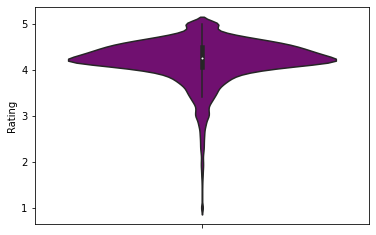

In [25]:
sns.violinplot(y = "Rating", data = df, color = "purple");
# normal bir dağılım soz konusu degildir, veriler normal dagilmamislardir.

Daha iyi anlayabilmek için Rating üzerine bir distplot çizdirelim.

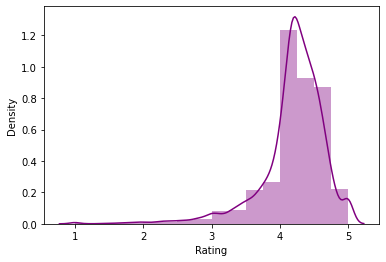

In [26]:
sns.distplot(df["Rating"], bins = 16, color = "purple");

Category özniteliğine göre bir gruplama işlemi yapalım ve görselleştirelim.

<AxesSubplot:>

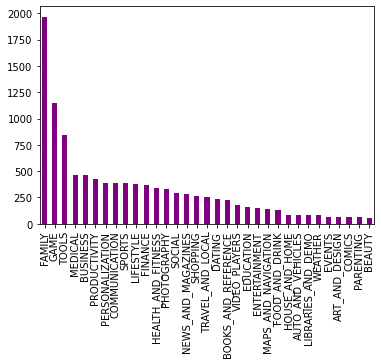

In [27]:
df["Category"].value_counts().plot(kind = "bar", color="purple")

Her Kategorideki ortalama Rating oranlarını hesaplayalım ve görselleştirelim

In [28]:
df.groupby(["Category"])["Rating"].mean()

Category
ART_AND_DESIGN         4.376159
AUTO_AND_VEHICLES      4.190411
BEAUTY                 4.278571
BOOKS_AND_REFERENCE    4.346067
BUSINESS               4.121452
COMICS                 4.155172
COMMUNICATION          4.158537
DATING                 3.970769
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 4.435556
FAMILY                 4.192370
FINANCE                4.131889
FOOD_AND_DRINK         4.166972
GAME                   4.286326
HEALTH_AND_FITNESS     4.277104
HOUSE_AND_HOME         4.197368
LIBRARIES_AND_DEMO     4.179396
LIFESTYLE              4.094904
MAPS_AND_NAVIGATION    4.051613
MEDICAL                4.189143
NEWS_AND_MAGAZINES     4.132189
PARENTING              4.300000
PERSONALIZATION        4.335403
PHOTOGRAPHY            4.192114
PRODUCTIVITY           4.211396
SHOPPING               4.259664
SOCIAL                 4.255598
SPORTS                 4.223511
TOOLS                  4.047230
TRAVEL_AND_LOCAL       4.109292

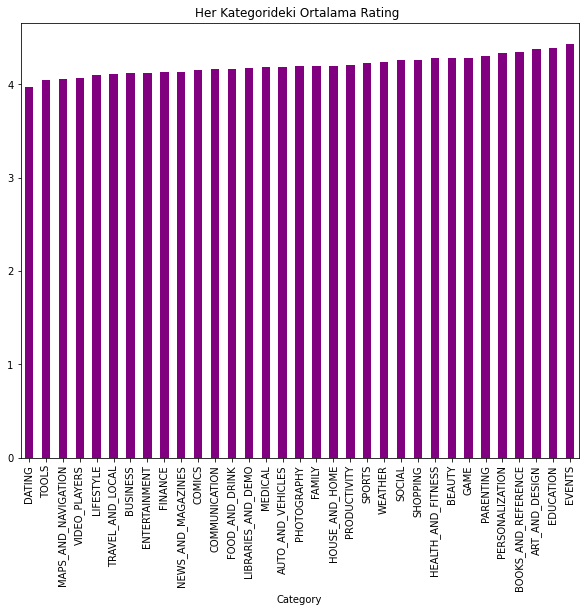

In [29]:
df.groupby(["Category"])["Rating"].mean().sort_values().plot(kind = "bar", color="purple" , figsize = (10,8));
plt.title("Her Kategorideki Ortalama Rating ");

Her kategorinin yüklenme oranlarını hesaplayalım. En çok yüklenen ilk 15 kategoriyi görselleştirerek gösterelim.

In [30]:
df["Category"].value_counts().head(15)

FAMILY                1968
GAME                  1144
TOOLS                  841
MEDICAL                463
BUSINESS               460
PRODUCTIVITY           424
PERSONALIZATION        390
COMMUNICATION          387
SPORTS                 384
LIFESTYLE              382
FINANCE                366
HEALTH_AND_FITNESS     341
PHOTOGRAPHY            335
SOCIAL                 295
NEWS_AND_MAGAZINES     283
Name: Category, dtype: int64

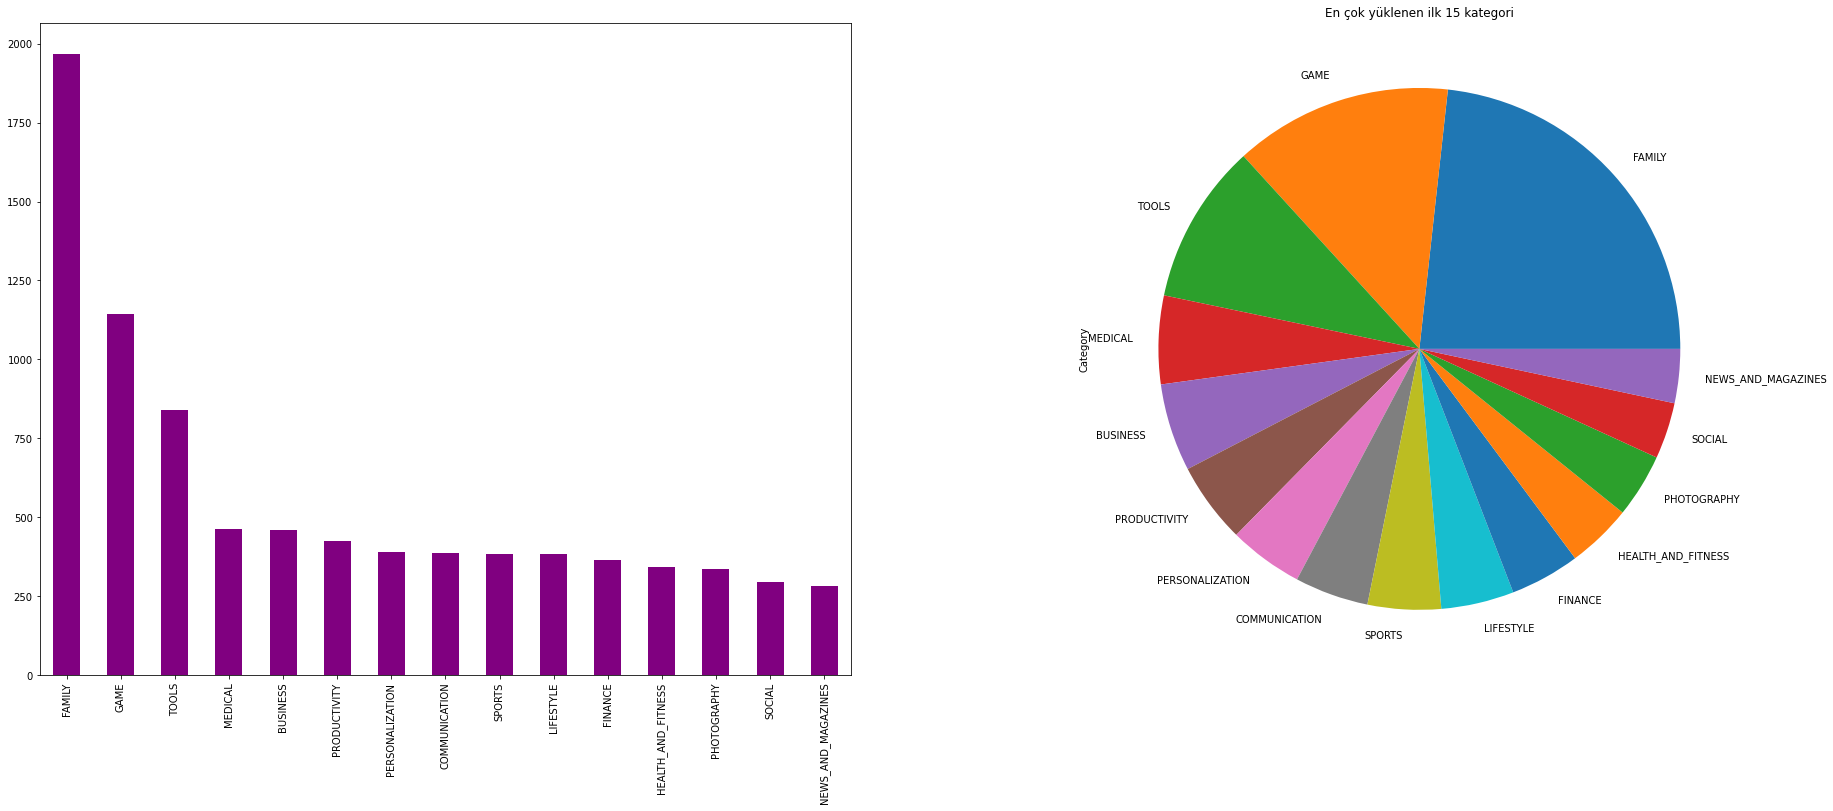

In [31]:
fig, axarr = plt.subplots(1, 2, figsize=(32, 12))
df.Category.value_counts().head(15).plot.pie(shadow=False, ax=axarr[1])
df.Category.value_counts().head(15).plot(kind='bar', color="purple", ax=axarr[0])
plt.title('En çok yüklenen ilk 15 kategori');

* Her kategorideki toplam uygulama indirme sayısına göre en popüler kategorilerin Game, Communication ve Productivity olduğunu ve en az popüler olanların Parenting, Beauty, Events olduğunu açıkça görebiliyoruz.

En çok sayıda yüklenmiş ilk 10 uygulamayı bulalım ve görselleştirelim.

In [32]:
df["App"].value_counts().head(10)

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
8 Ball Pool                                          7
ESPN                                                 7
slither.io                                           6
Bubble Shooter                                       6
Zombie Catchers                                      6
Temple Run 2                                         6
Name: App, dtype: int64

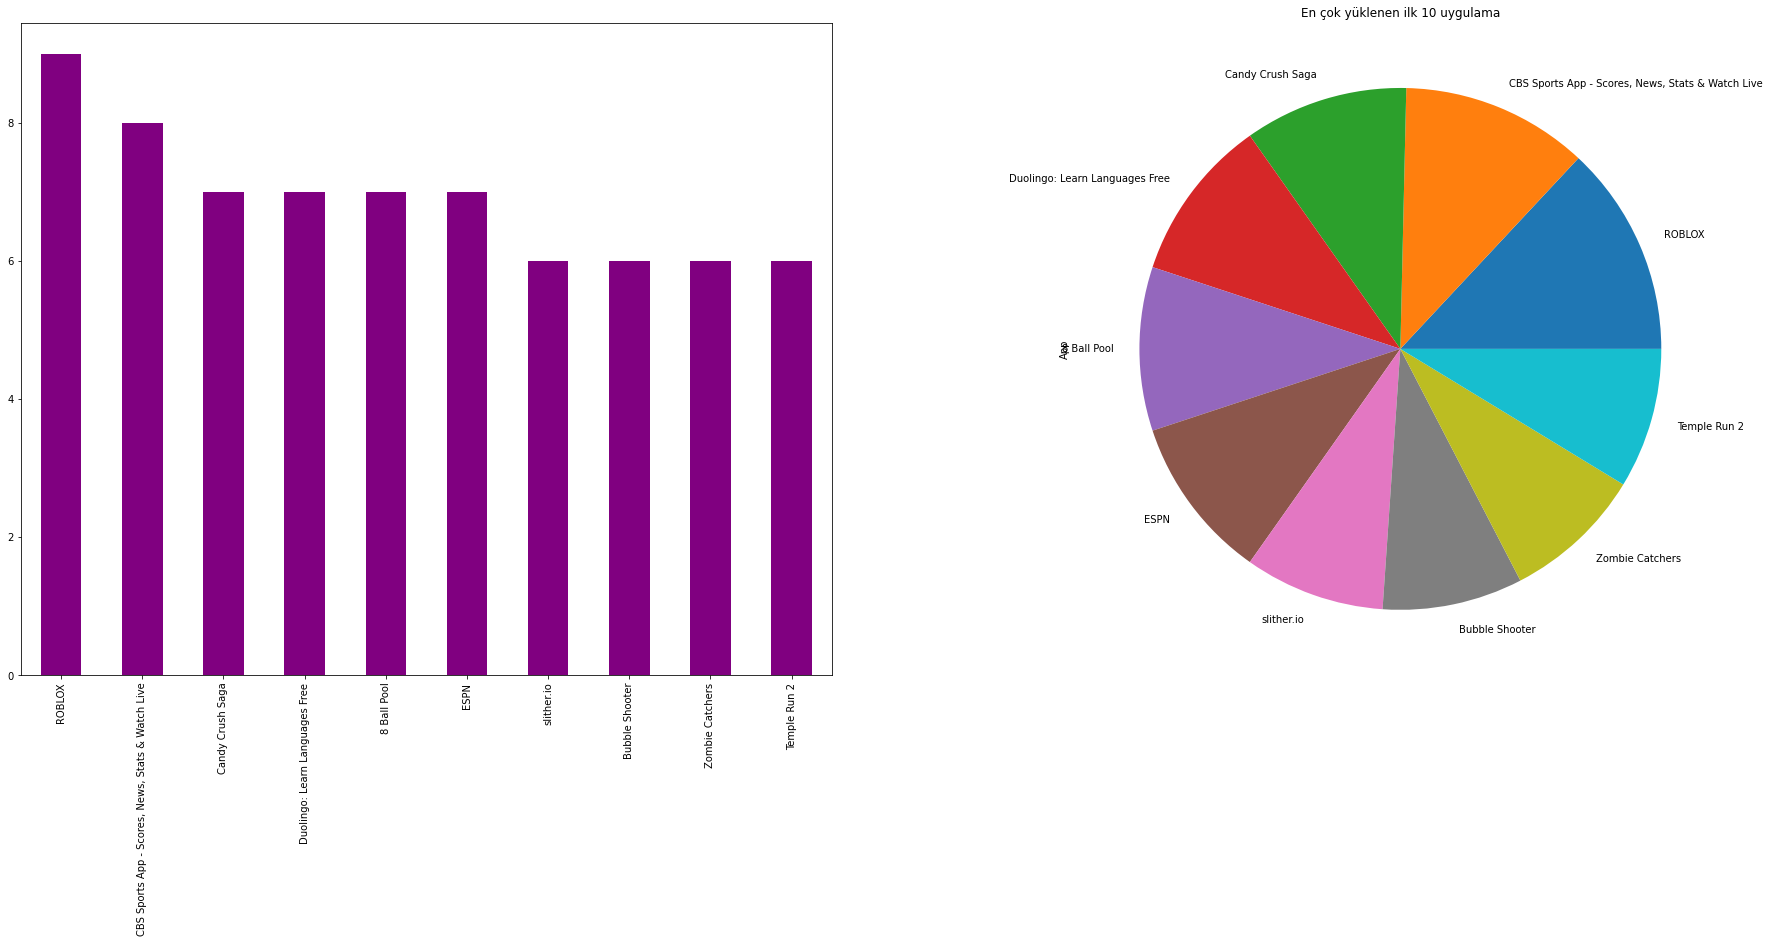

In [33]:
fig, axarr = plt.subplots(1, 2, figsize=(32, 12))
df['App'].value_counts().head(10).plot.pie(shadow=False, ax=axarr[1])
df['App'].value_counts().head(10).plot(kind='bar', color="purple", ax=axarr[0])
plt.title('En çok yüklenen ilk 10 uygulama');

'Genre' ye göre, en çok sayıda uygulamanın bulunduğu en iyi 10 türü gösteren bir çubuk grafik çizdirelim.

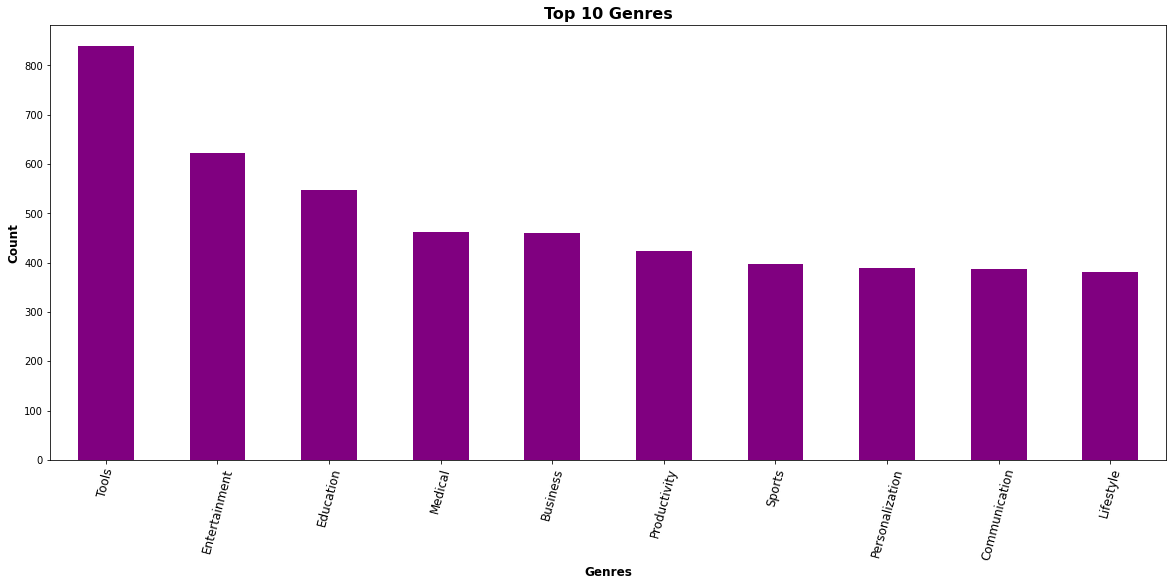

In [34]:
dfgenre = df['Genres'].value_counts()[:10]
dfgenre.plot.bar(figsize=[20,8] , color="purple")
plt.xlabel('Genres', fontsize=12, fontweight='bold')
plt.xticks(rotation=75, fontsize=12)
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Top 10 Genres', fontweight='bold', fontsize=16)
plt.show()

Google Play Store'daki ücretsiz ve ücretli uygulamaların yüzdesini inceleyelim.

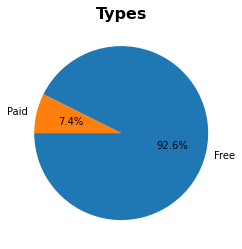

In [35]:
dftype = df['Type'].value_counts()
plt.pie(dftype, labels = dftype.index, autopct='%1.1f%%', startangle=180)
plt.title('Types', fontweight='bold', fontsize=16)
plt.show()

Daha iyi analiz edebilmek için bir de count plot ile bakalım.

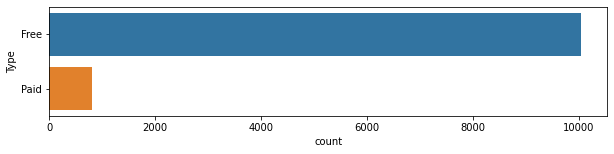

In [36]:
plt.figure(figsize=(10,2))
sns.countplot(y = 'Type',data = df);

* Açıkçası çoğu uygulamanın Google Play Store'da ücretsiz olduğunu görebiliyoruz

Elimizdeki verilere göre ücretsiz ve ücretli uygulamaların tam sayısını bulalım.

In [37]:
print('Ücretsiz uygulama sayısı: {}\nÜcretli uygulama sayısı: {}'.format(df['Type'].value_counts()[0], df['Type'].value_counts()[1]))

Ücretsiz uygulama sayısı: 10032
Ücretli uygulama sayısı: 797


'Category'e göre ücretli veya ücretsiz uygulamaların değerlendirmesini yapalım ortalama puanlarını hesaplayalım.

<function matplotlib.pyplot.show(close=None, block=None)>

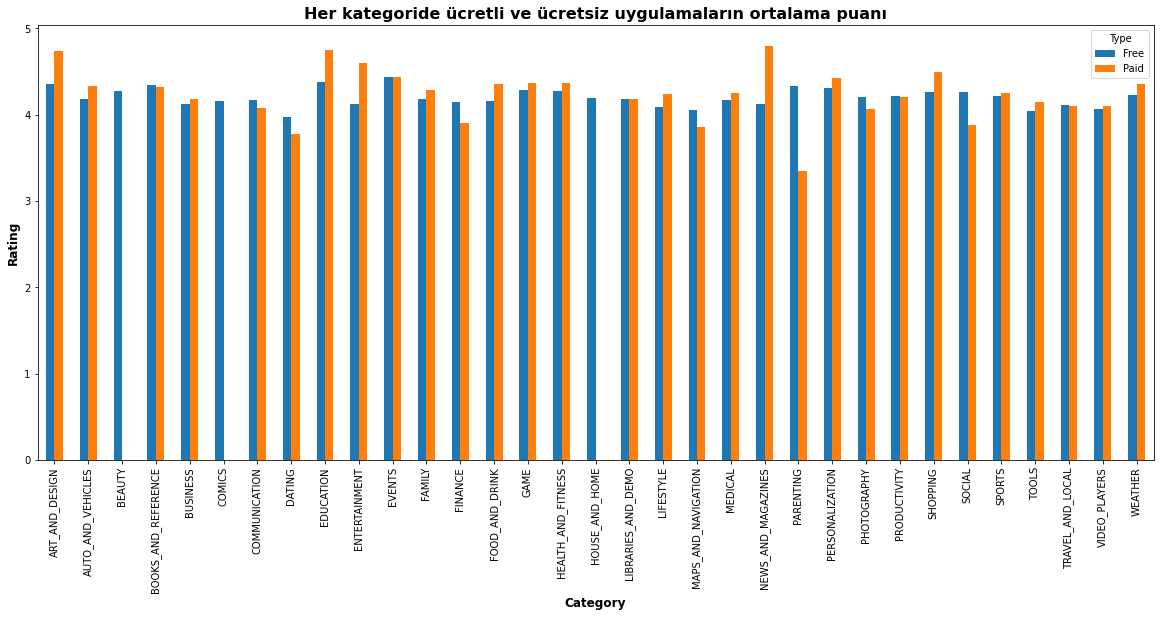

In [38]:
dfrating_mean = df.groupby(['Category', 'Type'])['Rating'].mean().unstack().sort_values('Category')
dfrating_mean.plot.bar(figsize=[20,8])
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.title('Her kategoride ücretli ve ücretsiz uygulamaların ortalama puanı', fontsize=16, fontweight='bold')
plt.show

* Kategorilerin çoğunda Ücretli uygulamaların Ücretsiz uygulamalara kıyasla daha yüksek ortalama derecelendirmeye sahip olduğunu görebiliriz, ancak bu her kategori için doğru değildir.

En çok 'Reviews' alan uygulama ve 'Reviews' sayısına bakalım

In [39]:
dfreviews = df[df['Reviews'] == df['Reviews'].max()][['App', 'Reviews']].reset_index(drop=True)
print('En çok değerlendirme alan uygulama: {}'.format(dfreviews['App'][0]))
print('Ve {} değerlendirmesi var '.format(dfreviews['Reviews'][0]))

En çok değerlendirme alan uygulama: Facebook
Ve 78158306 değerlendirmesi var 


'Reviews' sayısına göre ilk 10 uygulamayı karşılaştıralım

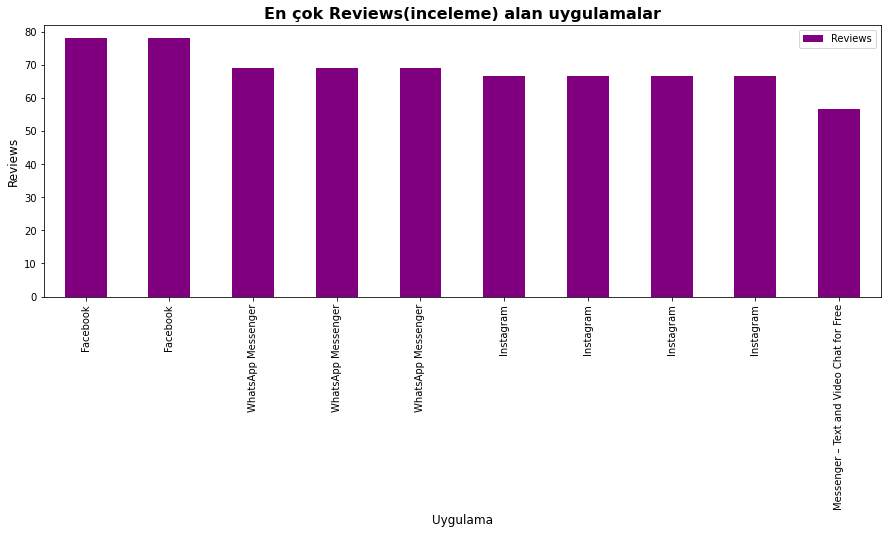

In [40]:
dfreviews = df.sort_values('Reviews', ascending=False)[['App', 'Reviews']][:10]
dfreviews['Reviews'] = dfreviews['Reviews']/10**6
dfreviews.plot.bar(x='App', y='Reviews', figsize=[15,5], color="purple")
plt.title('En çok Reviews(inceleme) alan uygulamalar', fontweight='bold', fontsize=16)
plt.xlabel('Uygulama', fontsize=12)
plt.ylabel('Reviews', fontsize=12)
plt.show()

Maksimum boyuta sahip uygulamaların adı ve kategorisine bakalım.

In [41]:
print('Maksimum boyuta sahip uygulamaların kategorisi ve boyutu')
df[df['Size'] == df['Size'].max()][['App', 'Category', 'Size']].reset_index(drop=True)

Maksimum boyuta sahip uygulamaların kategorisi ve boyutu


,App,Category,Size
0,Post Bank,FINANCE,100000000.0
1,Talking Babsy Baby: Baby Games,LIFESTYLE,100000000.0
2,Hungry Shark Evolution,GAME,100000000.0
3,Mini Golf King - Multiplayer Game,GAME,100000000.0
4,Hungry Shark Evolution,GAME,100000000.0
5,Navi Radiography Pro,MEDICAL,100000000.0
6,Hungry Shark Evolution,GAME,100000000.0
7,Vi Trainer,HEALTH_AND_FITNESS,100000000.0
8,Ultimate Tennis,SPORTS,100000000.0
9,The Walking Dead: Our World,GAME,100000000.0


Tüm bu uygulamaların boyutu 100Mb'dir

Her kategoriden maksimum boyuta sahip uygulamaların adı nedir?

In [42]:
df.sort_values(['Size', 'Rating'], ascending=False).groupby('Category').first()[['App', 'Size']]

,App,Size
Category,,
ART_AND_DESIGN,FlipaClip - Cartoon animation,39000000.0
AUTO_AND_VEHICLES,Repair Hyundai Santa Fe,97000000.0
BEAUTY,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",57000000.0
BOOKS_AND_REFERENCE,Bilingual Dictionary Audio App,87000000.0
BUSINESS,PIO bv App,98000000.0
COMICS,Faustop Sounds,40000000.0
COMMUNICATION,Microsoft Edge,66000000.0
DATING,"iPair-Meet, Chat, Dating",77000000.0
EDUCATION,Memorado - Brain Games,97000000.0


Uzun zamandır güncellenmeyen uygulamalara bakalım.

In [43]:
df['Güncellemeden bu yana geçen gün sayısı'] = (pd.Timestamp.now() - df['Last Updated']).dt.days
df_last_updated = df[df['Güncellemeden bu yana geçen gün sayısı'] == df['Güncellemeden bu yana geçen gün sayısı'].max()][['App', 'Last Updated']].reset_index(drop=True)

print('Uzun zamandır güncellenmeyen uygulama: {}'.format(df_last_updated['App'][0]))
print('En son tarihinde güncellendi: {}'.format(df_last_updated['Last Updated'][0]))

Uzun zamandır güncellenmeyen uygulama: FML F*ck my life + widget
En son tarihinde güncellendi: 2010-05-21 00:00:00


Sahip oldukları 'Content Rating' göre uygulama sayısını gösteren bir plot chart çizelim.

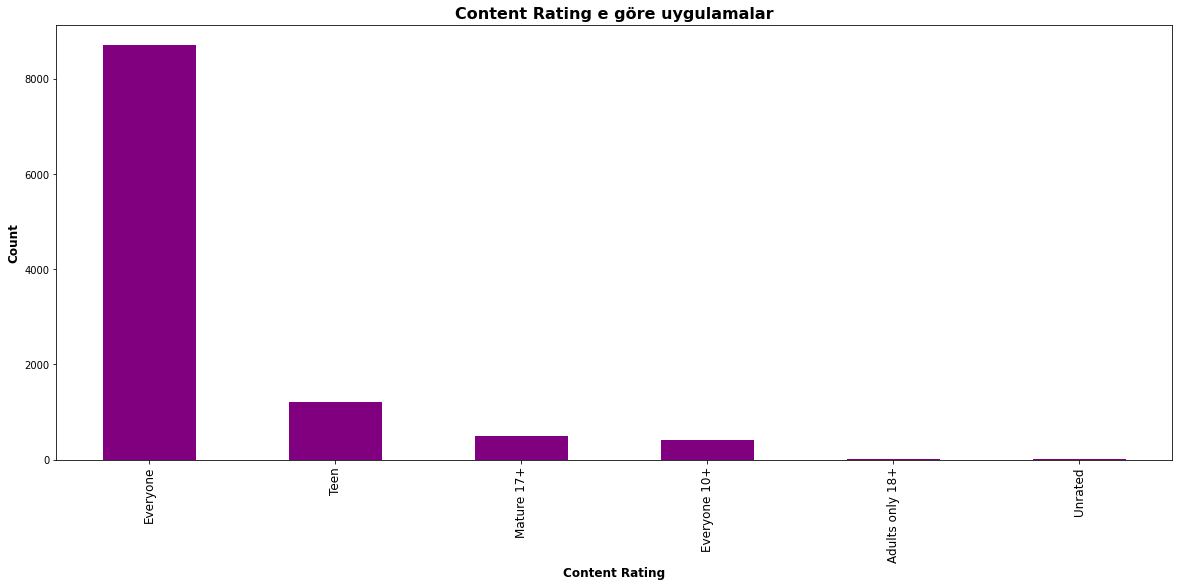

In [44]:
dfrating = df['Content Rating'].value_counts()
dfrating.plot.bar(figsize=[20,8], color = "purple")
plt.xlabel('Content Rating', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Content Rating e göre uygulamalar' , fontweight='bold', fontsize=16)
plt.show()

* Uygulamaların çoğunun herkes/everyone için olduğunu görebiliriz